In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [43]:
def plot(trace_file: str, comm_file: str):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    max_time = 0
    status = {}
    isLegendSet = False
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Await for receive':
                el.append('red')
            elif y[i] == 'Balance':
                el.append('blue')
            elif y[i] == 'Receive':
                el.append('brown')
            elif y[i] == 'Send':
                el.append('orange')
            elif y[i] == 'Solve':
                el.append('green')
            else:
                el.append('black')
            status[el[-1]] = False
            el.append(y[i])
            res.append(el)
        for el in res:
            if not status[el[2]] and not isLegendSet:
                status[el[2]] = True
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0, label=el[3])
            else:
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0)   
        isLegendSet = True
    scale = processes / max_time
    head_width = 2
    length = head_width * scale
    ax.legend()
    for col in time.columns:
        sndr, rcvr = map(int, col[1:-1].split(', '))
        for interval in time[col]:
            if interval != '':
                start, end = map(float, interval.split(':'))
                y = abs(rcvr-sndr)
                x = end-start
                gip = math.sqrt(y ** 2 + x ** 2)
                sin = y / gip
                width = (0.5 / 2 - 0.025 / 2) * sin + 0.025 / 2
                cos = x / gip
                lenth = (0.5 - 0.025) * cos + 0.025

                ax.arrow(start, sndr, end-start, rcvr-sndr, length_includes_head=True, width=width, head_length=lenth)
    plt.show()

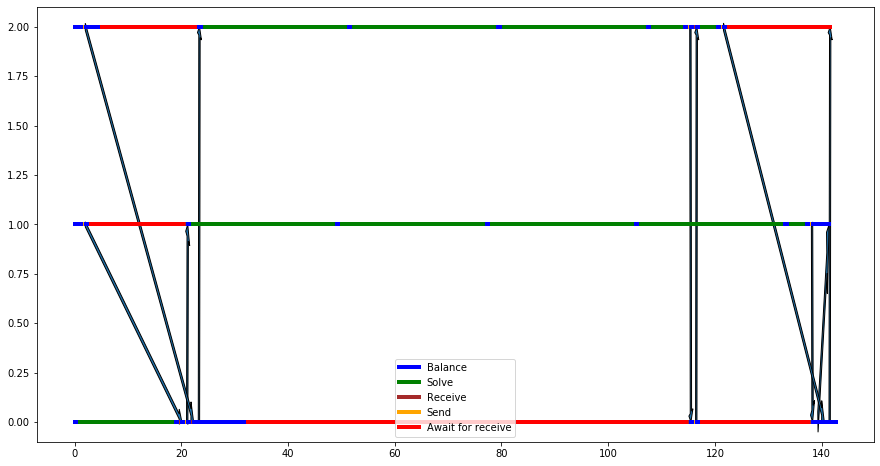

In [44]:
plot('Trace.csv', 'Communication.csv')

In [48]:
def count(trace_file: str, comm_file: str):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3

    max_time = 0
    Tseq = 0
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Solve':
                Tseq += el[1] - el[0]
            el.append(y[i])
            res.append(el)

    acceleration = Tseq / max_time
    efficiency = acceleration / processes
    return acceleration, efficiency

In [84]:
# for i in range(10):
# count('Trace.csv', 'Communication.csv')+count('Trace.csv', 'Communication.csv')
count('Trace.csv', 'Communication.csv')

(1.4763061968408262, 0.49210206561360875)

In [59]:
from Engine import Engine

In [85]:
eng = Engine(proc_amount=3, max_depth=9)
eng.run()

   timestamp0             state0                       args0 timestamp1  \
0           0               init                           -          0   
1     0.0-1.0            Balance              state=starting    0.0-1.0   
2    1.0-19.0              Solve                  tasks_am=6    1.0-2.0   
3   19.0-20.0            Balance                state=solved    2.0-2.1   
4   20.0-20.1            Receive                 get_request    2.1-3.1   
5   20.1-21.1            Balance  state=received_get_request   3.1-21.1   
6   21.1-21.2               Send                      dest=1  21.1-21.2   
7   21.2-22.2            Balance             state=sent_subs  21.2-22.2   
8   22.2-22.3            Receive                 get_request  22.2-25.2   
9   22.3-23.3            Balance  state=received_get_request  25.2-26.2   
10  23.3-23.4               Send                      dest=2  26.2-26.3   
11  23.4-24.4            Balance             state=sent_subs  26.3-27.3   
12  24.4-26.2  Await for 

In [33]:
time = pd.read_csv("Communication.csv", index_col=0)
time = time.fillna('')
time.head()

,"(1, 0)","(0, 1)","(2, 0)","(0, 2)"
0,2.0:20.1,21.1:21.200000000000003,2.0:22.300000000000004,23.300000000000004:23.400000000000006
1,138.2:138.29999999999998,139.29999999999998:141.39999999999998,115.4:115.5,116.5:116.6
2,,,121.6:140.49999999999997,141.49999999999997:141.59999999999997


In [10]:
df.head()

,timestamp0,state0,args0,timestamp1,state1,args1,timestamp2,state2,args2
0,0,init,-,0,init,-,0,init,-
1,0.0-1.0,Balance,state=starting,0.0-1.0,Balance,state=starting,0.0-1.0,Balance,state=starting
2,1.0-19.0,Solve,tasks_am=6,1.0-2.0,Balance,state=nothing_to_receive,1.0-2.0,Balance,state=nothing_to_receive
3,19.0-20.0,Balance,state=solved,2.0-2.1,Send,dest=0,2.0-2.1,Send,dest=0
4,20.0-20.1,Receive,get_request,2.1-3.1,Balance,state=sent_get_request,2.1-3.1,Balance,state=sent_get_request
